<a href="https://colab.research.google.com/github/JorgeAccardi/cienciadedatos/blob/main/TelecomX_Parte2_Latam_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Telecom X – Parte 2: Predicción de Churn

## Paso 1: Carga y exploración inicial del dataset

En esta etapa:

✅ Cargaremos el archivo `datos_tratados.csv` previamente tratado en la Parte 1.  
✅ Verificaremos dimensiones, estructura y tipos de datos.  
✅ Verificaremos la presencia de valores nulos.  
✅ Realizaremos una inspección inicial para asegurarnos de que los datos están listos para el preprocesamiento y modelado.

Esto nos permitirá detectar problemas de calidad de datos antes de avanzar con el pipeline de machine learning.

---


In [3]:
# Paso 1: Carga y exploración inicial del dataset

import pandas as pd

# 📂 Carga del dataset tratado
ruta = '/content/datos_tratados.csv'  # Ajustar si estás en local
df = pd.read_csv(ruta)

# 📌 Verificar dimensiones
print(f"Dimensiones del dataset: {df.shape}")

# 📌 Vista rápida de las primeras filas
display(df.head())

# 📌 Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# 📌 Verificación de valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

# 📌 Verificar columnas disponibles
print("\nColumnas del dataset:")
print(df.columns.tolist())


Dimensiones del dataset: (7267, 21)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



Tipos de datos:
customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object

Cantidad de valores nulos por columna:
customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner    

# 🚀 Telecom X – Parte 2: Predicción de Churn

## Paso 2: Preprocesamiento de datos

En este paso:

✅ Eliminaremos columnas irrelevantes (`customerID`).  
✅ Corregiremos tipos de datos para `account_Charges_Total`.  
✅ Trataremos los valores nulos en `Churn`.  
✅ Aplicaremos codificación One-Hot a variables categóricas.  
✅ Calcularemos la proporción de cancelación de clientes.  
✅ Diagnosticaremos el nivel de desbalance de clases para decidir si aplicamos técnicas de balanceo.

Este preprocesamiento es indispensable para preparar los datos para el entrenamiento de los modelos predictivos de churn.

---


In [5]:
# Paso 2: Preprocesamiento de datos

# 2.1 - Eliminar columna irrelevante
df.drop(columns=['customerID'], inplace=True)

# 2.2 - Corregir tipo de account_Charges_Total
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Verificar si la conversión generó nulos
print("Valores nulos en 'account_Charges_Total' tras conversión:")
print(df['account_Charges_Total'].isnull().sum())

# 2.3 - Tratamiento de nulos en 'Churn'
nulos_churn = df['Churn'].isnull().sum()
print(f"\nCantidad de valores nulos en 'Churn': {nulos_churn}")

# Visualizar distribución de Churn antes de eliminar nulos
print("\nDistribución de 'Churn' antes de limpiar nulos:")
print(df['Churn'].value_counts(dropna=False))

# Decidimos eliminar los registros nulos en Churn para evitar problemas en el target
df = df.dropna(subset=['Churn'])

# 2.4 - Encoding de variables categóricas
# Identificar columnas categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')  # target se codifica aparte

# Aplicar One-Hot Encoding a variables categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Codificar target: 1 = Yes, 0 = No
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# 2.5 - Verificación de la proporción de churn
churn_rate = df_encoded['Churn'].mean()
print(f"\nProporción de clientes que cancelaron: {churn_rate:.2%}")

# Verificación de dimensiones finales
print(f"\nDimensiones tras preprocesamiento: {df_encoded.shape}")

# Vista de las primeras filas para verificar estructura final
display(df_encoded.head())


Valores nulos en 'account_Charges_Total' tras conversión:
11

Cantidad de valores nulos en 'Churn': 224

Distribución de 'Churn' antes de limpiar nulos:
Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64

Proporción de clientes que cancelaron: 26.54%

Dimensiones tras preprocesamiento: (7043, 31)


,Churn,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


# 🚀 Telecom X – Parte 2: Predicción de Churn

## Paso 3: Análisis de correlación y selección de variables

En este paso:

✅ Visualizaremos la matriz de correlación para identificar relaciones relevantes entre variables numéricas y `Churn`.  
✅ Realizaremos análisis dirigido de:
- Tiempo de contrato (`customer_tenure`) vs. `Churn`.
- Gasto total (`account_Charges_Total`) vs. `Churn`.

✅ Generaremos boxplots y scatter plots para detectar tendencias, outliers y relaciones visuales.  
✅ Seleccionaremos variables clave para avanzar a la fase de modelado.

---


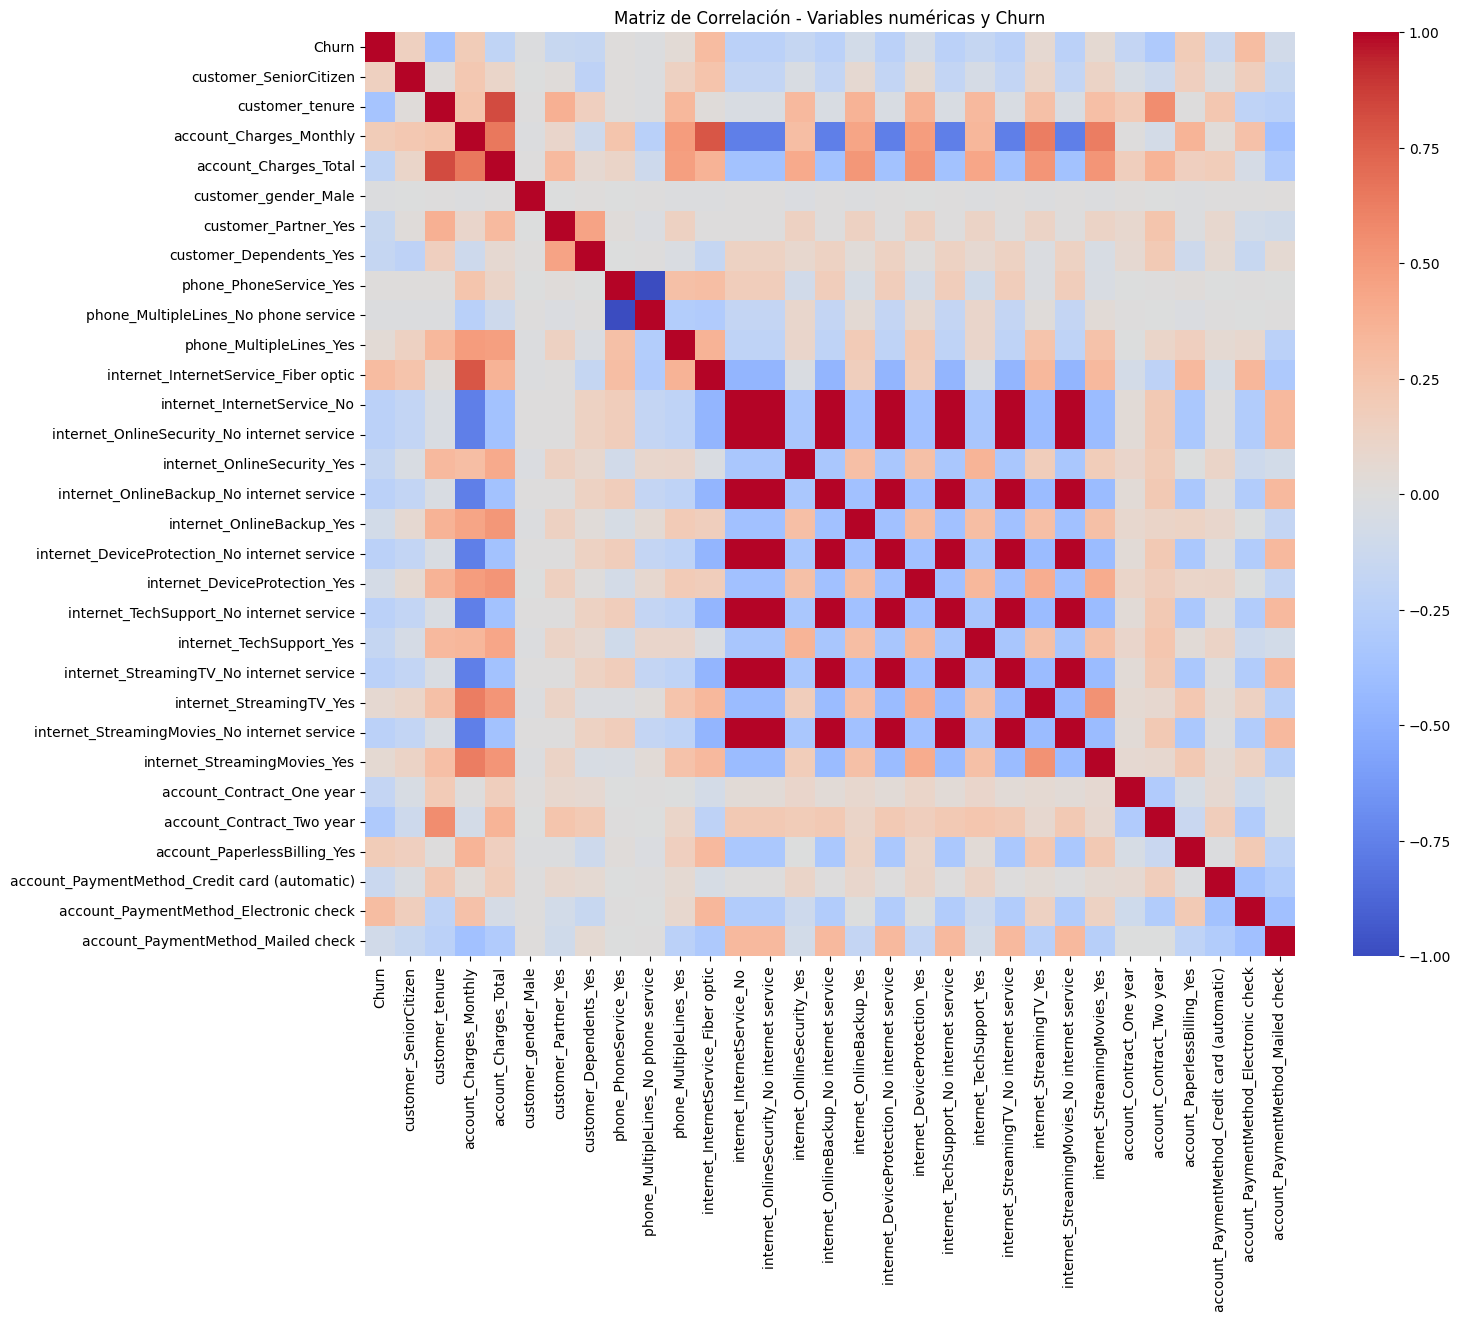


Correlación de las variables con 'Churn':
Churn                                            1.000000
internet_InternetService_Fiber optic             0.308020
account_PaymentMethod_Electronic check           0.301919
account_Charges_Monthly                          0.193356
account_PaperlessBilling_Yes                     0.191825
customer_SeniorCitizen                           0.150889
internet_StreamingTV_Yes                         0.063228
internet_StreamingMovies_Yes                     0.061382
phone_MultipleLines_Yes                          0.040102
phone_PhoneService_Yes                           0.011942
customer_gender_Male                            -0.008612
phone_MultipleLines_No phone service            -0.011942
internet_DeviceProtection_Yes                   -0.066160
internet_OnlineBackup_Yes                       -0.082255
account_PaymentMethod_Mailed check              -0.091683
account_PaymentMethod_Credit card (automatic)   -0.134302
customer_Partner_Yes         

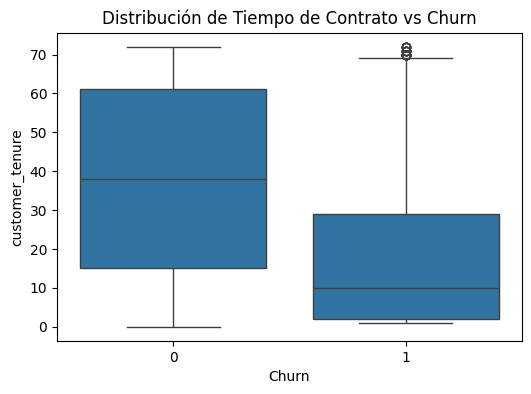

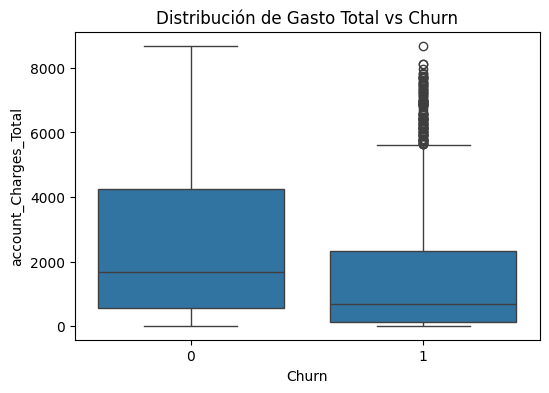

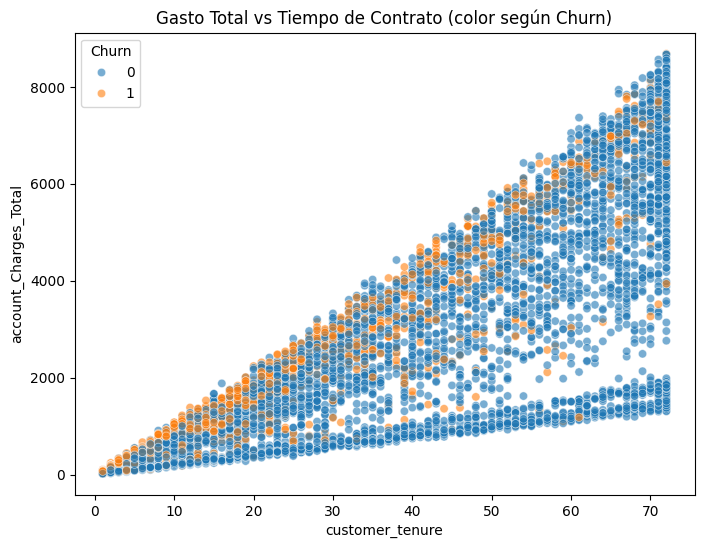

In [6]:
# Paso 3: Análisis de correlación y selección de variables

import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 - Matriz de correlación
plt.figure(figsize=(15, 12))
corr_matrix = df_encoded.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación - Variables numéricas y Churn')
plt.show()

# Correlación de variables más relevantes con 'Churn'
cor_target = corr_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelación de las variables con 'Churn':")
print(cor_target)

# 3.2 - Boxplot: customer_tenure vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='customer_tenure', data=df_encoded)
plt.title('Distribución de Tiempo de Contrato vs Churn')
plt.show()

# 3.3 - Boxplot: account_Charges_Total vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='account_Charges_Total', data=df_encoded)
plt.title('Distribución de Gasto Total vs Churn')
plt.show()

# 3.4 - Scatter plot: Gasto Total vs Tiempo de Contrato con color según Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer_tenure', y='account_Charges_Total', hue='Churn', data=df_encoded, alpha=0.6)
plt.title('Gasto Total vs Tiempo de Contrato (color según Churn)')
plt.show()


# 🚀 Telecom X – Parte 2: Predicción de Churn

## Paso 4: Separación de datos y modelado predictivo

En este paso:

✅ Separaremos el dataset en conjuntos de entrenamiento y prueba con un split 80/20.  
✅ Entrenaremos dos modelos predictivos:
- **Regresión Logística (requiere normalización).**
- **Random Forest (no requiere normalización).**

✅ Generaremos predicciones en el conjunto de prueba para ambos modelos, preparando el camino para la evaluación comparativa en el próximo paso.

---


In [8]:
# Paso 4 (ajustado): Separación de datos y modelado predictivo sin NaN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 0️⃣ Eliminamos registros con NaN en X
df_encoded_clean = df_encoded.dropna()
print(f"Dimensiones tras eliminar registros con NaN: {df_encoded_clean.shape}")

# Separar variables dependientes e independientes
X = df_encoded_clean.drop(columns=['Churn'])
y = df_encoded_clean['Churn']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --------------------------
# Modelo 1: Regresión Logística (requiere normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_logreg = log_reg.predict(X_test_scaled)
y_pred_proba_logreg = log_reg.predict_proba(X_test_scaled)[:, 1]

# --------------------------
# Modelo 2: Random Forest (no requiere normalización)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("✅ Modelos entrenados y predicciones realizadas correctamente sin NaN.")


Dimensiones tras eliminar registros con NaN: (7032, 31)
✅ Modelos entrenados y predicciones realizadas correctamente sin NaN.


# 🚀 Telecom X – Parte 2: Predicción de Churn

## Paso 5: Evaluación de modelos

En este paso:

✅ Calcularemos métricas de desempeño (accuracy, precision, recall, F1-score).  
✅ Generaremos las matrices de confusión para ambos modelos (Regresión Logística y Random Forest).  
✅ Analizaremos posibles señales de overfitting o underfitting para entender la capacidad de generalización de cada modelo.  
✅ Prepararemos insights para decidir el modelo más adecuado para Telecom X.

---



📊 Regresión Logística - Métricas:
Accuracy: 0.8017
Precision: 0.6578
Recall: 0.5294
F1-score: 0.5867


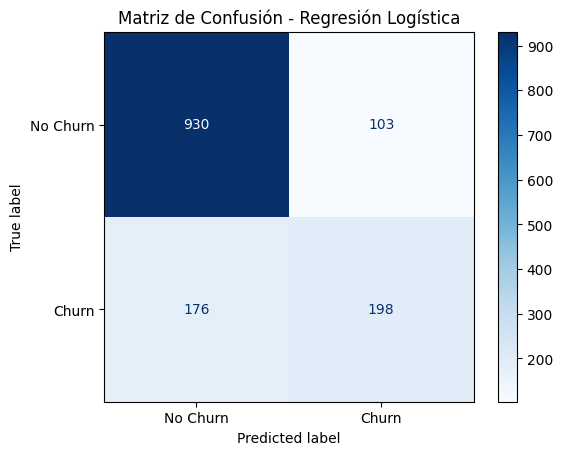


📊 Random Forest - Métricas:
Accuracy: 0.7875
Precision: 0.6374
Recall: 0.4652
F1-score: 0.5379


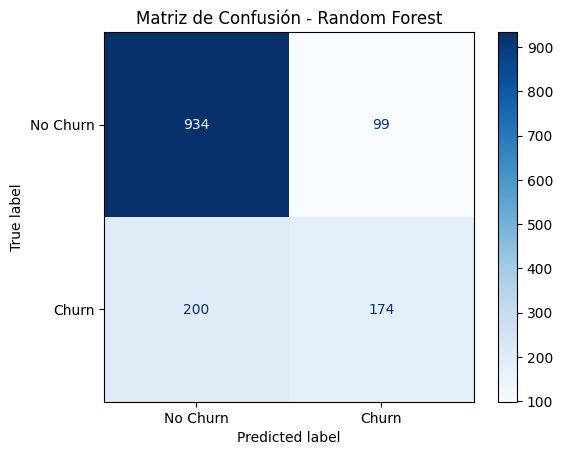

In [9]:
# Paso 5: Evaluación de modelos

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Función para imprimir métricas
def imprimir_metricas(y_test, y_pred, nombre_modelo):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n📊 {nombre_modelo} - Métricas:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

# Evaluación de Regresión Logística
imprimir_metricas(y_test, y_pred_logreg, "Regresión Logística")

# Evaluación de Random Forest
imprimir_metricas(y_test, y_pred_rf, "Random Forest")


# 🚀 Telecom X – Parte 2: Predicción de Churn

## Paso 6: Interpretación de resultados e importancia de variables

En este paso:

✅ Analizaremos la importancia de las variables en ambos modelos para identificar los principales factores que impulsan la cancelación de clientes.  
✅ Utilizaremos los coeficientes de la Regresión Logística y las importancias de las características del Random Forest.  
✅ Generaremos insights claros para construir estrategias de retención de clientes en Telecom X.

---


🔹 Principales variables según Regresión Logística (coeficientes):
customer_tenure                          -1.312513
account_Charges_Total                     0.611552
internet_InternetService_Fiber optic      0.586406
account_Contract_Two year                -0.564971
account_Charges_Monthly                  -0.533799
account_Contract_One year                -0.290872
internet_StreamingTV_Yes                  0.216805
account_PaperlessBilling_Yes              0.181248
account_PaymentMethod_Electronic check    0.167630
internet_TechSupport_Yes                 -0.161498
dtype: float64


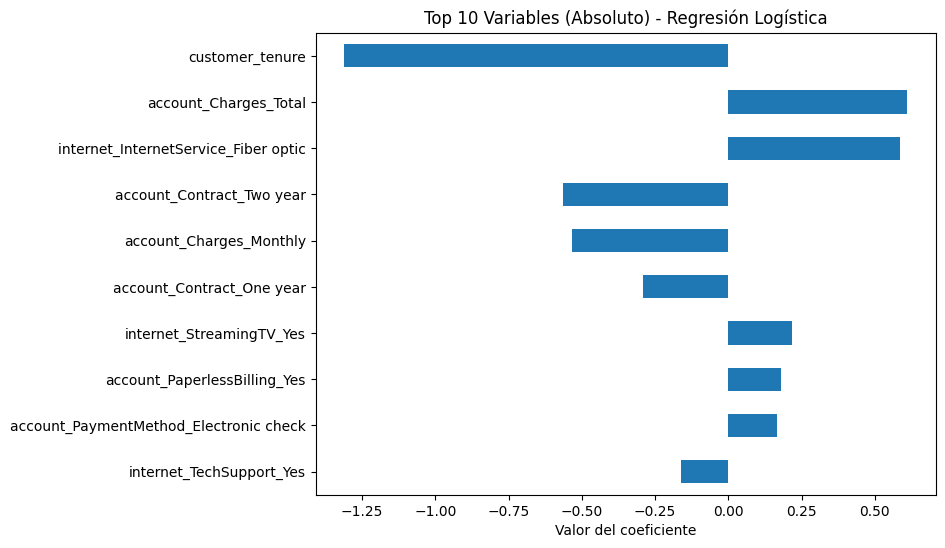


🔹 Principales variables según Random Forest (importancia):
account_Charges_Total                     0.191921
customer_tenure                           0.172634
account_Charges_Monthly                   0.171372
account_PaymentMethod_Electronic check    0.040146
internet_InternetService_Fiber optic      0.037168
customer_gender_Male                      0.029115
account_Contract_Two year                 0.029070
internet_OnlineSecurity_Yes               0.027092
account_PaperlessBilling_Yes              0.026118
customer_Partner_Yes                      0.023390
dtype: float64


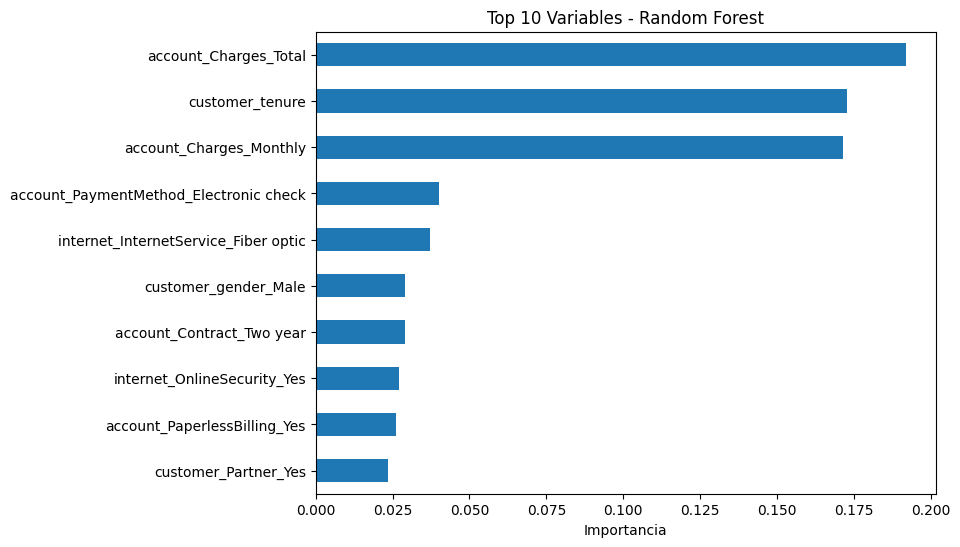

In [10]:
# Paso 6: Interpretación de resultados e importancia de variables

import numpy as np

# Para Regresión Logística
coef_logreg = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("🔹 Principales variables según Regresión Logística (coeficientes):")
print(coef_logreg.head(10))

# Visualización de coeficientes
plt.figure(figsize=(8, 6))
coef_logreg.head(10).plot(kind='barh')
plt.title('Top 10 Variables (Absoluto) - Regresión Logística')
plt.xlabel('Valor del coeficiente')
plt.gca().invert_yaxis()
plt.show()

# Para Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n🔹 Principales variables según Random Forest (importancia):")
print(importances_rf.head(10))

# Visualización de importancias
plt.figure(figsize=(8, 6))
importances_rf.head(10).plot(kind='barh')
plt.title('Top 10 Variables - Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()


# 🚀 Telecom X – Parte 2: Predicción de Churn

## Paso 7: Conclusiones y recomendaciones estratégicas

Tras el análisis completo de los datos de Telecom X y el entrenamiento de modelos predictivos de churn, se concluye:

✅ **Conclusiones:**
- El churn está fuertemente asociado con:
   - Baja permanencia del cliente (`customer_tenure`).
   - Uso de fibra óptica.
   - Métodos de pago electrónicos.
   - Facturación sin papel.
   - Cargos mensuales altos con baja permanencia.
- Contratos a largo plazo (1-2 años) y soporte técnico reducen el churn.
- Clientes con soporte técnico, seguridad en línea y contratos largos presentan menor riesgo de cancelación.

✅ **Recomendaciones estratégicas:**
1. **Campañas de fidelización temprana:** Dirigidas a nuevos clientes (bajo tenure) para reducir cancelaciones tempranas.
2. **Ofrecer descuentos en cargos mensuales a clientes con tenure bajo y cargos altos.**
3. **Promover contratos de uno o dos años con beneficios asociados (soporte técnico gratuito, descuentos).**
4. **Monitorear clientes con Fiber optic y cargos altos, ofreciendo soporte proactivo.**
5. **Identificar clientes con facturación electrónica y sin soporte técnico para campañas específicas de retención.**

Con este análisis, Telecom X podrá anticiparse al churn y aplicar acciones de retención con foco en las variables que más influyen en la cancelación.

---
